<a href="https://colab.research.google.com/github/opeyemiferanmi1/Hamoye-Task1-Understanding-Electricity-Utility-data-/blob/master/Grid_System_Stability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv')
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [2]:
"""Because of the direct relationship between 'stab' and 'stabf' ('stabf' = 'stable' if 'stab' <= 0, 'unstable' otherwise),
 'stab' should be dropped and 'stabf' will remain as the sole dependent variable (binary classification)."""
 
df= df.drop('stab',1)
df.head(2)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable


In [3]:
#Dependent and Independent variables
x = df.drop('stabf',1)
y = df.stabf

In [4]:
#encode categorical variable
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

array([1, 0, 1, ..., 0, 1, 1])

In [5]:
df.isna().sum().any()

False

In [6]:
#Split into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
y_train

array([1, 1, 1, ..., 1, 1, 0])

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [8]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
rndm_clf = RandomForestClassifier(random_state=1)
rndm_clf.fit(x_train,y_train)
y_pred_rf = rndm_clf.predict(x_test)

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf,digits =4))

              precision    recall  f1-score   support

           0     0.9191    0.8778    0.8980       712
           1     0.9341    0.9573    0.9456      1288

    accuracy                         0.9290      2000
   macro avg     0.9266    0.9176    0.9218      2000
weighted avg     0.9288    0.9290    0.9286      2000



In [10]:
#Extra Trees forest

from sklearn.ensemble import ExtraTreesClassifier
ET_clf = ExtraTreesClassifier(random_state=1)
ET_clf.fit(x_train,y_train)
y_predET = ET_clf.predict(x_test)

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predET,digits =4))

              precision    recall  f1-score   support

           0     0.9410    0.8511    0.8938       712
           1     0.9218    0.9705    0.9455      1288

    accuracy                         0.9280      2000
   macro avg     0.9314    0.9108    0.9197      2000
weighted avg     0.9287    0.9280    0.9271      2000



In [12]:
from xgboost import XGBClassifier
XG_clf = XGBClassifier(random_state=1)
XG_clf.fit(x_train,y_train)
y_predXG = XG_clf.predict(x_test)

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predXG,digits =4))

              precision    recall  f1-score   support

           0     0.9206    0.8469    0.8822       712
           1     0.9190    0.9596    0.9389      1288

    accuracy                         0.9195      2000
   macro avg     0.9198    0.9033    0.9105      2000
weighted avg     0.9195    0.9195    0.9187      2000



In [14]:
from xgboost import XGBClassifier
XG_clf = XGBClassifier(random_state=1)
XG_clf.fit(x_train,y_train)
y_predXG = XG_clf.predict(x_test)

In [15]:
#Hyperparameters
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None] 


In [16]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'n_estimators': n_estimators,
              'min_samples_leaf': min_samples_leaf,
              'min_samples_split': min_samples_split,
              'max_features': max_features}
ExT_clf = ExtraTreesClassifier(random_state=1)  
random_search = RandomizedSearchCV(ExT_clf, param_grid, cv=5,n_iter =10,
                                   scoring ='accuracy',n_jobs =-1,verbose =1,random_state = 1)  
random_search.fit(x_train,y_train)
random_search.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.5min finished


{'max_features': None,
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [17]:
#Extra Trees forest

from sklearn.ensemble import ExtraTreesClassifier
ET_clf = ExtraTreesClassifier(max_features = None, min_samples_leaf= 8,
                              min_samples_split=2,n_estimators= 1000,random_state=1)
ET_clf.fit(x_train,y_train)
y_predET = ET_clf.predict(x_test)

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predET,digits =4))

              precision    recall  f1-score   support

           0     0.9211    0.8694    0.8945       712
           1     0.9300    0.9589    0.9442      1288

    accuracy                         0.9270      2000
   macro avg     0.9256    0.9141    0.9193      2000
weighted avg     0.9268    0.9270    0.9265      2000



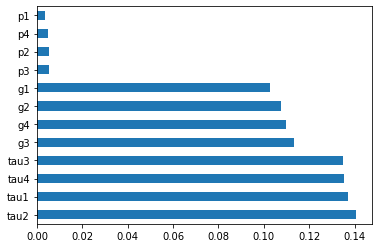

In [19]:
#feature importance
import matplotlib.pyplot as plt
feat_importance = pd.Series(ET_clf.feature_importances_, index=x.columns)
feat_importance.nlargest(12).plot(kind='barh')
plt.show()